In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
df_dispo_alim2017 = pd.read_csv(r"/home/tanguy/Bureau/DisponibiliteAlimentaire_2017.csv")
df_pop_2000_2018 = pd.read_csv(r"/home/tanguy/Bureau/Population_2000_2018.csv")

## Première étape: Préparation de la table de travail (df_final)

#### 1) Préparation de la première table source: la disponibilité alimentaire 2017

In [3]:
df_dispo_alim2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
df_dispo_alim2017.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [5]:
df_dispo_alim2017['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [6]:
df_dispo_alim2017 = df_dispo_alim2017[df_dispo_alim2017['Produit'].eq('Viande de Volailles')]

In [7]:
df_dispo_alim2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2061 non-null   object 
 1   Domaine                 2061 non-null   object 
 2   Code zone               2061 non-null   int64  
 3   Zone                    2061 non-null   object 
 4   Code Élément            2061 non-null   int64  
 5   Élément                 2061 non-null   object 
 6   Code Produit            2061 non-null   int64  
 7   Produit                 2061 non-null   object 
 8   Code année              2061 non-null   int64  
 9   Année                   2061 non-null   int64  
 10  Unité                   2061 non-null   object 
 11  Valeur                  2061 non-null   float64
 12  Symbole                 2061 non-null   object 
 13  Description du Symbole  2061 non-null   object 
dtypes: float64(1), int64(5), object(8)
m

In [8]:
df_dispo_alim2017 = df_dispo_alim2017.loc[:,['Code zone','Zone','Code Élément','Élément','Année','Unité','Valeur','Description du Symbole']]

In [9]:
df_dispo_alim2017.head(10)

,Code zone,Zone,Code Élément,Élément,Année,Unité,Valeur,Description du Symbole
651,2,Afghanistan,5511,Production,2017,Milliers de tonnes,28.00,Données standardisées
652,2,Afghanistan,5611,Importations - Quantité,2017,Milliers de tonnes,29.00,Données standardisées
653,2,Afghanistan,5072,Variation de stock,2017,Milliers de tonnes,0.00,Données standardisées
654,2,Afghanistan,5301,Disponibilité intérieure,2017,Milliers de tonnes,57.00,Données standardisées
655,2,Afghanistan,5123,Pertes,2017,Milliers de tonnes,2.00,Données standardisées
656,2,Afghanistan,5170,Résidus,2017,Milliers de tonnes,0.00,Données standardisées
657,2,Afghanistan,5142,Nourriture,2017,Milliers de tonnes,55.00,Données standardisées
658,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2017,kg,1.53,Donnée calculée
659,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2017,Kcal/personne/jour,5.00,Donnée calculée
660,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2017,g/personne/jour,0.54,Donnée calculée


In [10]:
len(df_dispo_alim2017['Zone'].unique())

172

In [11]:
df_pivot1 = pd.pivot_table(df_dispo_alim2017, values = 'Valeur', index = ['Code zone','Zone'], columns=['Élément'], aggfunc=np.sum)
df_pivot1.head(3)

,Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Code zone,Zone,,,,,,,,,,,,,,,,,
1,Arménie,NaN,NaN,NaN,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,0.0,11.0,0.0,NaN,NaN,-2.0
2,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
3,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0


In [12]:
df_pivot1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 172 entries, (1, 'Arménie') to (276, 'Soudan')
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Alimentation pour touristes                                    78 non-null     float64
 1   Aliments pour animaux                                          1 non-null      float64
 2   Autres utilisations (non alimentaire)                          34 non-null     float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 7   Disponibilité intérieure             

In [13]:
df_dispo_alim2017 = df_pivot1
del df_dispo_alim2017["Alimentation pour touristes"]
del df_dispo_alim2017["Autres utilisations (non alimentaire)"]
del df_dispo_alim2017["Aliments pour animaux"]
del df_dispo_alim2017["Semences"]
del df_dispo_alim2017["Traitement"]
del df_dispo_alim2017["Pertes"]
df_dispo_alim2017.reset_index(inplace = True)

In [14]:
df_dispo_alim2017.head()

Élément,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock
0,1,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0
1,2,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0,0.0
2,3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0
3,4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0
4,7,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0


#### 2) Préparation de la deuxième table source: la population par zone de 2000 à 2018

In [15]:
df_pop_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
# sélection des données qui nous intéressent
df_pop_2000_2018 = df_pop_2000_2018.loc[:,['Code zone','Zone','Année','Unité','Valeur','Description du Symbole','Note']]

In [17]:
df_pop_2000_2018.head(2)

,Code zone,Zone,Année,Unité,Valeur,Description du Symbole,Note
0,2,Afghanistan,2000,1000 personnes,20779.953,Sources internationales sûres,NaN
1,2,Afghanistan,2001,1000 personnes,21606.988,Sources internationales sûres,NaN


In [18]:
# on exprime la population en nombre d'individus & on nomme mieux les colonnes
df_pop_2000_2018['Valeur'] = df_pop_2000_2018['Valeur']*1000
del df_pop_2000_2018['Unité']
df_pop_2000_2018['Valeur'] = df_pop_2000_2018['Valeur'].astype('int64')
df_pop_2000_2018 = df_pop_2000_2018.rename(columns={"Valeur": "Population", "Description du Symbole": "Type_de_source"})

In [19]:
df_pop_2000_2018.head(2)

,Code zone,Zone,Année,Population,Type_de_source,Note
0,2,Afghanistan,2000,20779953,Sources internationales sûres,NaN
1,2,Afghanistan,2001,21606988,Sources internationales sûres,NaN


In [20]:
# on regarde le nombre de zone (correspondant souvant à des pays)
nb_pays = len(df_pop_2000_2018['Zone'].unique())
nb_pays

238

In [21]:
# on se penche plus sur les deux dernières colonnes pour voir leurs intérêt
df_pop_2000_2018["Type_de_source"].unique()

array(['Sources internationales sûres',
       'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées'],
      dtype=object)

In [22]:
# le mieux serait de n'avoir que des données de sources sûres; regardons l'intérêt des autres sources 
filtered_df = df_pop_2000_2018[df_pop_2000_2018["Type_de_source"].eq('Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées')]
filtered_df['Zone'].unique()

array(['Antilles néerlandaises (ex)', 'Serbie-et-Monténégro',
       'Soudan (ex)'], dtype=object)

In [23]:
# on voit que les sources semi-officielles correspondent à des zones n'existant plus: Soudan = 2 pays aujourd'hui. Supprimons ces lignes
df_pop_2000_2018 = df_pop_2000_2018[df_pop_2000_2018['Type_de_source'].eq('Sources internationales sûres')]
# de ce fait nous pouvons supprimer le 'type de source'
del df_pop_2000_2018['Type_de_source']
# regardons à quoi correspondent les 'Note'
df_pop_2000_2018['Note'].unique()

array([nan,
       'UNDESA, Population Division – World Population Prospects, the 2017 Revision'],
      dtype=object)

In [24]:
""" 
'Note' indique donc simplement la source pour certaines données, mais toutes les données restantes sont reconnues comme sûres.
Ainsi nous pouvons donc supprimer Note
"""

" \n'Note' indique donc simplement la source pour certaines données, mais toutes les données restantes sont reconnues comme sûres.\nAinsi nous pouvons donc supprimer Note\n"

In [25]:
del df_pop_2000_2018['Note']
# Le nombre de zone restantes:
nb_pays = len(df_pop_2000_2018['Zone'].unique())
nb_pays

235

In [26]:
df_pop_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 4410
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code zone   4374 non-null   int64 
 1   Zone        4374 non-null   object
 2   Année       4374 non-null   int64 
 3   Population  4374 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 170.9+ KB


In [27]:
df_pop_2000_2018['Année'].value_counts()

2018    235
2017    235
2016    235
2015    235
2014    235
2013    235
2012    235
2011    233
2010    228
2009    228
2008    228
2007    228
2006    228
2001    226
2005    226
2004    226
2003    226
2002    226
2000    226
Name: Année, dtype: int64

In [28]:
"""
Nous avons les données alimentaires pour 172 zones et les données de population pour 235 zones. 
Tentons pour le moment de préserver nos données de population, et cherchons un taux de croissance entre l'année la plus ancienne
possible et l'année la plus récente (au moins 2017 - années des données alim)
On va donc garder uniquement les donées à partir de 2012
"""

"\nNous avons les données alimentaires pour 172 zones et les données de population pour 235 zones. \nTentons pour le moment de préserver nos données de population, et cherchons un taux de croissance entre l'année la plus ancienne\npossible et l'année la plus récente (au moins 2017 - années des données alim)\nOn va donc garder uniquement les donées à partir de 2012\n"

In [29]:
filter_list = [2012,2017]
df_pop_2012_2018 = df_pop_2000_2018.query("Année == @filter_list")

In [30]:
df_pop_2012_2018["test"] = df_pop_2012_2018['Population'].shift(1)

/tmp/ipykernel_27949/3903456909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_2012_2018["test"] = df_pop_2012_2018['Population'].shift(1)


In [31]:
df_pop_2012_2018 = df_pop_2012_2018[df_pop_2012_2018["Année"].eq(2017)]
df_pop_2012_2018["variation_pop%_2012_2017"] = (df_pop_2012_2018["Population"]*100/df_pop_2012_2018['test'])-100
del df_pop_2012_2018["test"]
df_pop_2017 = df_pop_2012_2018

In [32]:
df_pop_2017.head(10)

,Code zone,Zone,Année,Population,variation_pop%_2012_2017
17,2,Afghanistan,2017,36296113,16.477889
36,202,Afrique du Sud,2017,57009756,7.906280
55,3,Albanie,2017,2884169,-1.026974
74,4,Algérie,2017,41389189,10.713956
93,79,Allemagne,2017,82658409,2.081915
112,6,Andorre,2017,77001,-6.582794
131,7,Angola,2017,29816766,18.754373
150,258,Anguilla,2017,14584,5.719464
169,8,Antigua-et-Barbuda,2017,95426,5.549226
207,194,Arabie saoudite,2017,33101178,13.535557


In [33]:
df_pop_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 17 to 4409
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code zone                 235 non-null    int64  
 1   Zone                      235 non-null    object 
 2   Année                     235 non-null    int64  
 3   Population                235 non-null    int64  
 4   variation_pop%_2012_2017  235 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ KB


## reprise à partir des deux tables sources, fusion sur année 2017

In [34]:
df_dispo_alim2017.head()

Élément,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock
0,1,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0
1,2,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0,0.0
2,3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0
3,4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0
4,7,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0


In [35]:
df_pop_2017.reset_index()
df_pop_2017.head()

,Code zone,Zone,Année,Population,variation_pop%_2012_2017
17,2,Afghanistan,2017,36296113,16.477889
36,202,Afrique du Sud,2017,57009756,7.906280
55,3,Albanie,2017,2884169,-1.026974
74,4,Algérie,2017,41389189,10.713956
93,79,Allemagne,2017,82658409,2.081915


In [36]:
df_final0 = df_dispo_alim2017.merge(df_pop_2017, how = 'inner', on = ['Code zone','Zone'])

In [37]:
df_final0.head()

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Année,Population,variation_pop%_2012_2017
0,1,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0,2017,2944791,2.099587
1,2,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0,0.0,2017,36296113,16.477889
2,3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0,2017,2884169,-1.026974
3,4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0,2017,41389189,10.713956
4,7,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0,2017,29816766,18.754373


In [38]:
del df_final0['Année']
len(df_final0['Zone'].unique())

172

In [39]:
df_final0 = df_final0.rename(columns = {"Code zone": "Code_zone"})
df_final0['Zone'].unique()

array(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Bangladesh',
       'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Belize',
       'Îles Salomon', 'Bulgarie', 'Myanmar', 'Cameroun', 'Canada',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chili', 'Chine, continentale', 'Colombie', 'Congo', 'Costa Rica',
       'Cuba', 'Chypre', 'Azerbaïdjan', 'Bénin', 'Danemark', 'Dominique',
       'République dominicaine', 'Bélarus', 'Équateur', 'Égypte',
       'El Salvador', 'Estonie', 'Fidji', 'Finlande', 'France',
       'Polynésie française', 'Djibouti', 'Géorgie', 'Gabon', 'Gambie',
       'Allemagne', 'Bosnie-Herzégovine', 'Ghana', 'Kiribati', 'Grèce',
       'Grenade', 'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras',
       'Chine - RAS de Hong-Kong', 'Hongrie', 'Croatie', 'Islande',
       'Inde', 'Indonésie', "Iran (République isl

In [40]:
difference_1 = np.setdiff1d(df_dispo_alim2017['Zone'], df_pop_2012_2018['Zone'])
difference_2 = np.setdiff1d(df_pop_2012_2018['Zone'], df_dispo_alim2017['Zone'])

list_difference = np.concatenate((difference_1, difference_2))
print(list(list_difference))

['Andorre', 'Anguilla', 'Aruba', 'Bahreïn', 'Bermudes', 'Bhoutan', 'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Burundi', 'Comores', 'Curaçao', 'Gibraltar', 'Groenland', 'Guadeloupe', 'Guam', 'Guinée équatoriale', 'Guyane française', 'Libye', 'Liechtenstein', 'Martinique', 'Mayotte', 'Micronésie (États fédérés de)', 'Monaco', 'Montserrat', 'Nauru', 'Nioué', 'Palaos', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Porto Rico', 'Qatar', 'République arabe syrienne', 'République démocratique du Congo', 'Réunion', 'Sahara occidental', 'Saint-Barthélemy', 'Saint-Marin', 'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon', 'Saint-Siège', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Samoa américaines', 'Seychelles', 'Singapour', 'Sint Maarten  (partie néerlandaise)', 'Somalie', 'Soudan du Sud', 'Tokélaou', 'Tonga', 'Tuvalu', 'Érythrée', 'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook', 'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord', '

### importation de données supplémentaires de la FAO

In [41]:
df_PIB_hab = pd.read_csv(r"/home/tanguy/Bureau/donnees_supp_dollar.csv")
df_securite_pol = pd.read_csv(r"/home/tanguy/Bureau/securite_pol.csv")

In [42]:
df_securite_pol = df_securite_pol.loc[:,["Code zone (FAO)","Zone","Valeur"]]
df_PIB_hab = df_PIB_hab.loc[:,["Code zone (FAO)","Zone","Produit","Unit?","Valeur"]]

In [43]:
df_securite_pol.head(3)

,Code zone (FAO),Zone,Valeur
0,2,Afghanistan,-2.80
1,202,Afrique du Sud,-0.28
2,3,Albanie,0.38


In [44]:
df_PIB_hab = df_PIB_hab.rename(columns={"Code zone (FAO)": "Code_zone", "Unit?": "Unite"})
df_securite_pol = df_securite_pol.rename(columns={"Code zone (FAO)": "Code_zone"})

#### on fusionne les tables supp sur le Code_zone

In [45]:
df_final2 = pd.merge(df_PIB_hab,df_securite_pol, how= 'left', on = 'Code_zone')
df_que_PIB = df_final2[df_final2['Unite'].eq('I$')]
df_besoin_energ = df_final2[df_final2['Unite'].eq('Kcal/personne/jour')]

In [46]:
df_final3 = pd.merge(df_que_PIB,df_besoin_energ, how= 'inner', on = 'Code_zone')
df_final3 = df_final3.rename(columns = {'Valeur_x_x':"Dollar_an_hab", "Zone_y_x":"Zone","Valeur_y_x":"Stabilite_pol", "Valeur_x_y": "Besoin_energ_moyen(kcal,pers,jour)"})
df_final3 = df_final3.loc[:,["Code_zone", "Zone", "Dollar_an_hab", "Stabilite_pol", "Besoin_energ_moyen(kcal,pers,jour)"]]
df_final3.head()

,Code_zone,Zone,Dollar_an_hab,Stabilite_pol,"Besoin_energ_moyen(kcal,pers,jour)"
0,2,Afghanistan,2058.4,-2.80,2134.0
1,202,Afrique du Sud,12701.3,-0.28,2406.0
2,3,Albanie,12771.0,0.38,2490.0
3,4,Algérie,11737.4,-0.92,2289.0
4,79,Allemagne,52952.9,0.59,2545.0


### le df_final:

In [47]:
df_final = pd.merge(df_final0, df_final3, how = "inner", on = "Code_zone")
del df_final["Zone_y"]
df_final = df_final.rename(columns = {"Zone_x": "Zone"})
df_final.head(5)

,Code_zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Population,variation_pop%_2012_2017,Dollar_an_hab,Stabilite_pol,"Besoin_energ_moyen(kcal,pers,jour)"
0,1,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0,2944791,2.099587,12115.1,-0.62,2433.0
1,2,Afghanistan,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0,0.0,0.0,36296113,16.477889,2058.4,-2.80,2134.0
2,3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0,2884169,-1.026974,12771.0,0.38,2490.0
3,4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0,41389189,10.713956,11737.4,-0.92,2289.0
4,7,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0,29816766,18.754373,7310.9,-0.33,2105.0


In [48]:
df_final['Zone'].unique()

array(['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Bangladesh',
       'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Belize',
       'Îles Salomon', 'Bulgarie', 'Myanmar', 'Cameroun', 'Canada',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chili', 'Colombie', 'Congo', 'Costa Rica', 'Chypre',
       'Azerbaïdjan', 'Bénin', 'Danemark', 'Dominique',
       'République dominicaine', 'Bélarus', 'Équateur', 'Égypte',
       'El Salvador', 'Estonie', 'Fidji', 'Finlande', 'France',
       'Djibouti', 'Géorgie', 'Gabon', 'Gambie', 'Allemagne',
       'Bosnie-Herzégovine', 'Ghana', 'Kiribati', 'Grèce', 'Grenade',
       'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras',
       'Chine - RAS de Hong-Kong', 'Hongrie', 'Croatie', 'Islande',
       'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Irlande', 'Israël', 'Ital

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Code_zone                                                      164 non-null    int64  
 1   Zone                                                           164 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)                 164 non-null    float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)         164 non-null    float64
 4   Disponibilité de matière grasse en quantité (g/personne/jour)  164 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)       164 non-null    float64
 6   Disponibilité intérieure                                       162 non-null    float64
 7   Exportations - Quantité                                       

In [50]:
df1 = df_final[df_final['Disponibilité intérieure'].isna()]
print (df1)

     Code_zone                                   Zone  \
80         120  République démocratique populaire lao   
154        235                            Ouzbékistan   

     Disponibilité alimentaire (Kcal/personne/jour)  \
80                                             41.0   
154                                             6.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
80                                               10.91        
154                                               1.96        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
80                                                2.81               
154                                               0.40               

     Disponibilité de protéines en quantité (g/personne/jour)  \
80                                                3.59          
154                                               0.63          

     Disponibilité intérieure  Exportations - Quantité  \
80     

In [51]:
# On repère que deux pays n'ont aucun intérêt dans le dataframe et sont cause de beaucoup de Nan: nous les supprimons
drop_deux = df_final[df_final['Disponibilité intérieure'].isna()].index

df_final.drop(drop_deux , inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 163
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Code_zone                                                      162 non-null    int64  
 1   Zone                                                           162 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)                 162 non-null    float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)         162 non-null    float64
 4   Disponibilité de matière grasse en quantité (g/personne/jour)  162 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)       162 non-null    float64
 6   Disponibilité intérieure                                       162 non-null    float64
 7   Exportations - Quantité                                       

In [52]:
aucune_prod = df_final[df_final['Production'].isnull()]
print(aucune_prod)

    Code_zone      Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
43         72  Djibouti                                             9.0   
89        132  Maldives                                            47.0   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
43                                               2.68        
89                                              13.50        

    Disponibilité de matière grasse en quantité (g/personne/jour)  \
43                                               0.59               
89                                               2.94               

    Disponibilité de protéines en quantité (g/personne/jour)  \
43                                               0.92          
89                                               4.70          

    Disponibilité intérieure  Exportations - Quantité  \
43                       3.0                      NaN   
89                      12.0                      NaN   

    Importatio

array([[<AxesSubplot:title={'center':'Résidus'}>,
        <AxesSubplot:title={'center':'Variation de stock'}>],
       [<AxesSubplot:title={'center':'Production'}>,
        <AxesSubplot:title={'center':'Exportations - Quantité'}>]],
      dtype=object)

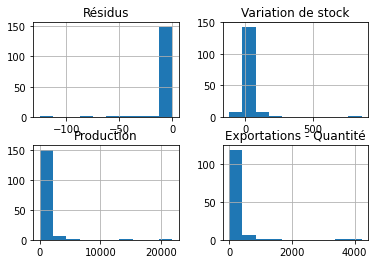

In [53]:
df_final.hist(column=['Résidus','Variation de stock','Production','Exportations - Quantité'])

In [54]:
median = df_final['Résidus'].median()
df_final['Résidus'].fillna(median, inplace=True)

median = df_final['Variation de stock'].median()
df_final['Variation de stock'].fillna(median, inplace=True)

median = df_final['Production'].median()
df_final['Production'].fillna(median, inplace=True)


In [55]:
df_final['Exportations - Quantité'].fillna(0, inplace=True)

In [56]:
df_final.isna().any()

Code_zone                                                        False
Zone                                                             False
Disponibilité alimentaire (Kcal/personne/jour)                   False
Disponibilité alimentaire en quantité (kg/personne/an)           False
Disponibilité de matière grasse en quantité (g/personne/jour)    False
Disponibilité de protéines en quantité (g/personne/jour)         False
Disponibilité intérieure                                         False
Exportations - Quantité                                          False
Importations - Quantité                                          False
Nourriture                                                       False
Production                                                       False
Résidus                                                          False
Variation de stock                                               False
Population                                                       False
variat

# début de la PCA 

In [57]:
from sklearn import decomposition
from sklearn import preprocessing

In [58]:
df_final.set_index(['Code_zone','Zone'], inplace = True)

In [59]:
df_final.head()

,,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Population,variation_pop%_2012_2017,Dollar_an_hab,Stabilite_pol,"Besoin_energ_moyen(kcal,pers,jour)"
Code_zone,Zone,,,,,,,,,,,,,,,,
1,Arménie,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0,2944791,2.099587,12115.1,-0.62,2433.0
2,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,0.0,0.0,36296113,16.477889,2058.4,-2.80,2134.0
3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0,2884169,-1.026974,12771.0,0.38,2490.0
4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0,41389189,10.713956,11737.4,-0.92,2289.0
7,Angola,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0,29816766,18.754373,7310.9,-0.33,2105.0


In [60]:
df_final.reset_index(inplace = True)
table_pays = df_final.loc[:,['Code_zone','Zone']]
table_pays.head()

,Code_zone,Zone
0,1,Arménie
1,2,Afghanistan
2,3,Albanie
3,4,Algérie
4,7,Angola


In [61]:
df_final.set_index(['Code_zone'], inplace = True)

In [62]:
del df_final['Zone']
df_final.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Résidus,Variation de stock,Population,variation_pop%_2012_2017,Dollar_an_hab,Stabilite_pol,"Besoin_energ_moyen(kcal,pers,jour)"
Code_zone,,,,,,,,,,,,,,,,
1,54.0,16.06,3.39,5.44,47.0,0.0,35.0,47.0,11.0,0.0,-2.0,2944791,2.099587,12115.1,-0.62,2433.0
2,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,28.0,0.0,0.0,36296113,16.477889,2058.4,-2.80,2134.0
3,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0,0.0,4.0,2884169,-1.026974,12771.0,0.38,2490.0
4,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,0.0,41389189,10.713956,11737.4,-0.92,2289.0
7,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,42.0,0.0,0.0,29816766,18.754373,7310.9,-0.33,2105.0


In [63]:
df_final = df_final.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "a", "Disponibilité alimentaire en quantité (kg/personne/an)": "b","Disponibilité de matière grasse en quantité (g/personne/jour)":"c","Disponibilité de protéines en quantité (g/personne/jour)":"d","Disponibilité intérieure":"e","Exportations - Quantité":"f","Importations - Quantité":"g","Nourriture":"h","Production":"i","Résidus":"j","Variation de stock":"k","Population":"l","variation_pop%_2012_2017":"m","Dollar_an_hab":"n","Stabilite_pol":"o","Besoin_energ_moyen(kcal,pers,jour)":"p"})

In [64]:
lst1 = ["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Nourriture","Production","Résidus","Variation de stock","Population","variation_pop%_2012_2017","Dollar_an_hab","Stabilite_pol","Besoin_energ_moyen(kcal,pers,jour)"]
lst2 = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p"]

table_variables = pd.DataFrame(list(zip(lst2,lst1)),columns = ['Symbole','Nom variable complet'])
table_variables.head(20)


,Symbole,Nom variable complet
0,a,Disponibilité alimentaire (Kcal/personne/jour)
1,b,Disponibilité alimentaire en quantité (kg/pers...
2,c,Disponibilité de matière grasse en quantité (g...
3,d,Disponibilité de protéines en quantité (g/pers...
4,e,Disponibilité intérieure
5,f,Exportations - Quantité
6,g,Importations - Quantité
7,h,Nourriture
8,i,Production
9,j,Résidus


In [65]:
# citation de Source: cours Openclassrooms accessible à l'adresse: https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees

# choix du nombre de composantes à calculer
n_comp = 6

X = df_final.values
names = df_final.index
features = df_final.columns

In [66]:
# Centrage et Réduction
std_scale = preprocessing. StandardScaler().fit(X)
x_scaled = std_scale.transform(X)

In [67]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = n_comp)
pca.fit(x_scaled)

PCA(n_components=6)

In [68]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

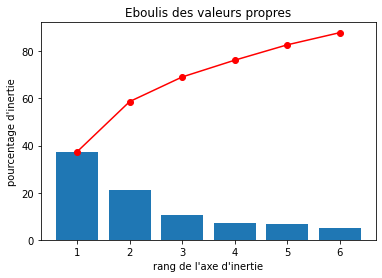

In [69]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [70]:
# source de ce code: cours Openclassrooms accessible à l'adresse: https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(15,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 2.2
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

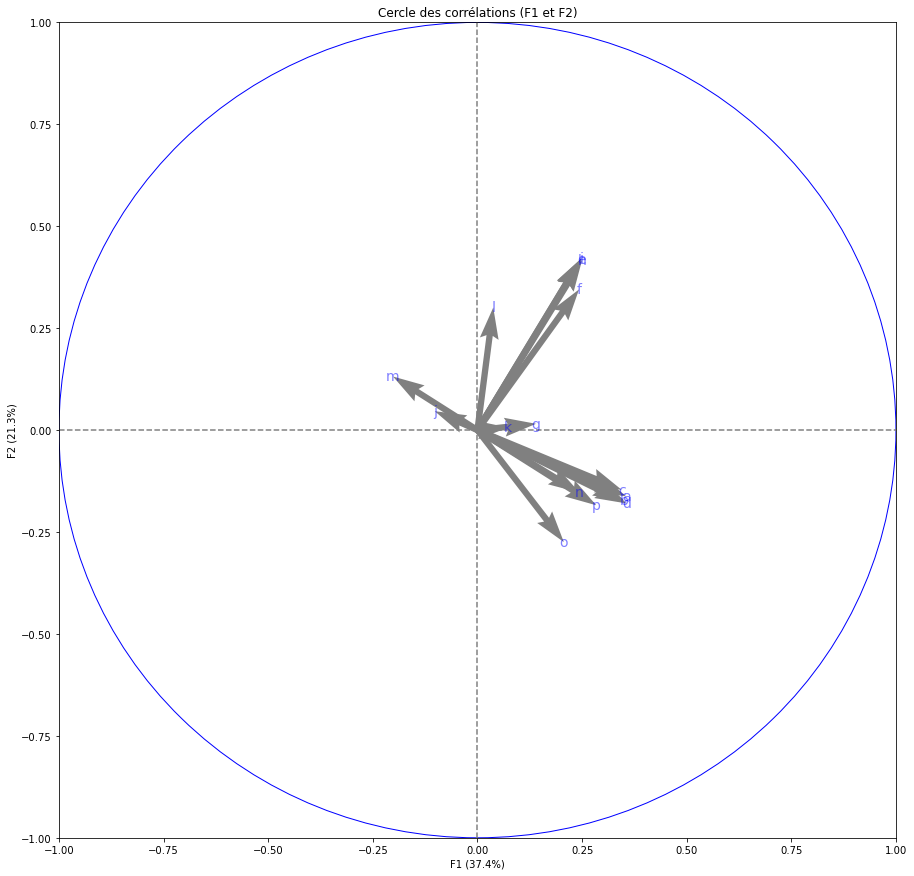

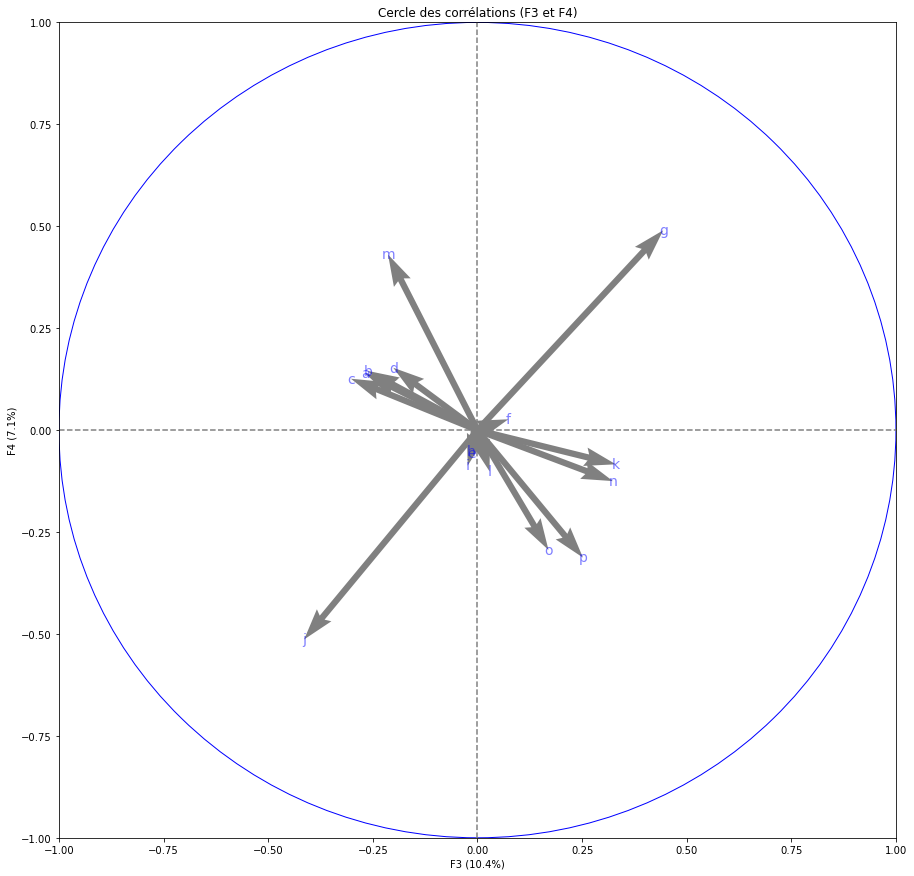

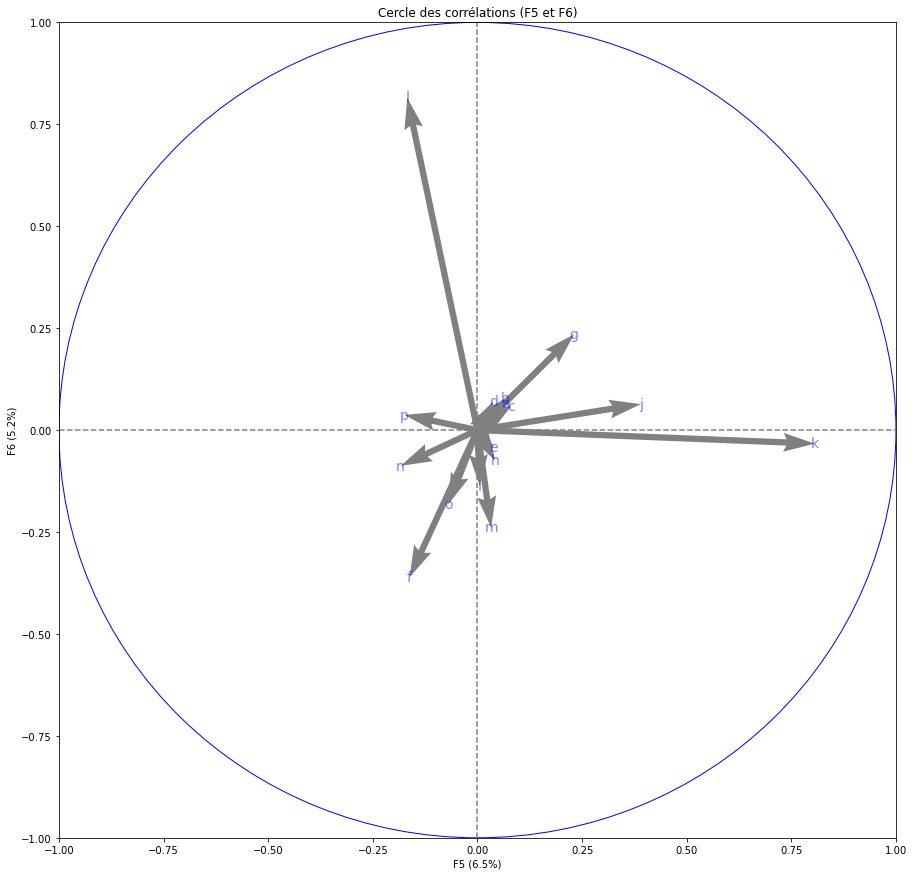

In [71]:
# Cercle des corrélations
pcs= pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

Commentaires à propos des cercles de corrélations. 

F1: Les variables fortements coorélées à cet axe sont c/a/b/d; il s'agit de toutes les disponibilités alimentaire (en kcal, en grammes, etc...)
On peut donc dire à propose de l'axe F1 qu'il représente la disponibilité alimentaire du pays (tous types confondus).

F2: e/h/i/k et f (tout de même assez proche) correspondent à: la dispo intérieure, la nourriture, la production, la variation de stock, l'exportation
Uniquement pour la viande de volailles. On peut supposer qu'un pays consommant beaucoup de poulets aura tendance à essayer d'en produire beaucoup pour réponse à cette demande locale - ou inversement.
Ensuite un pays produisant beaucoup a la capacité de se délester du surplus en l'exportant, et plus de production engendre plus de variation de stocks. 
Ainsi F2 correspondrait à la capacité du pays à produire et consommer du poulet. Les plus gros consommateurs ET producteurs vont de paire généralement. A noter que l'idéal pour notre investissement serait ici une exception: un gros consommateurs avec une faible production.

F3/F4: g et j sont anticorrélés (importations / résidus). Cela fait sens également, car les résidus de productions sont pour les pays... producteurs. Or, les pays produisants peu importent proportionnellement beaucoup plus que les auto-consommateurs. Et les produits finis importés sont délestés de la matière perdue (on ne va pas payer pour importer des résidus). 
On comprend donc que grand importateur = contraire de grand producteur de résidus de volaille. 

F5/F6: pas de synthétisation de variable possible ici. F5 représente k la variation de stock et F6 représente l la population.

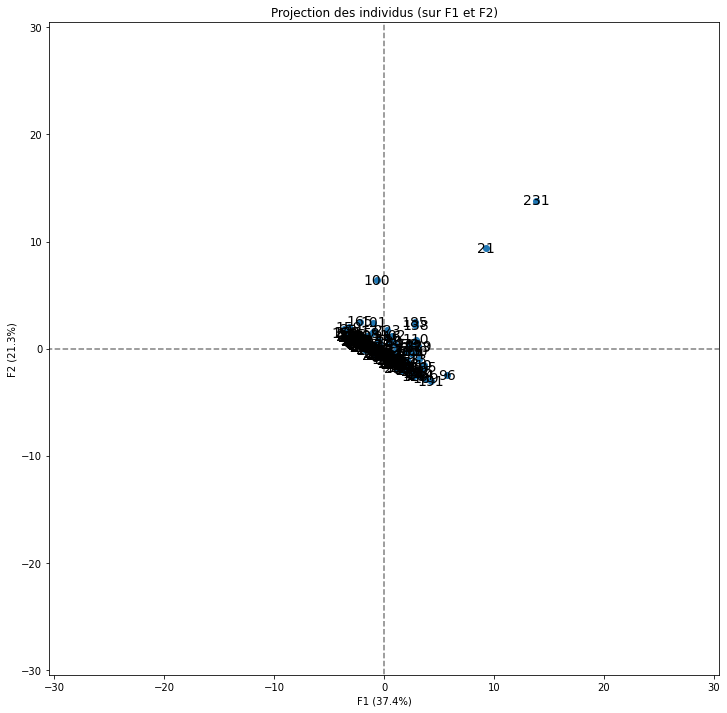

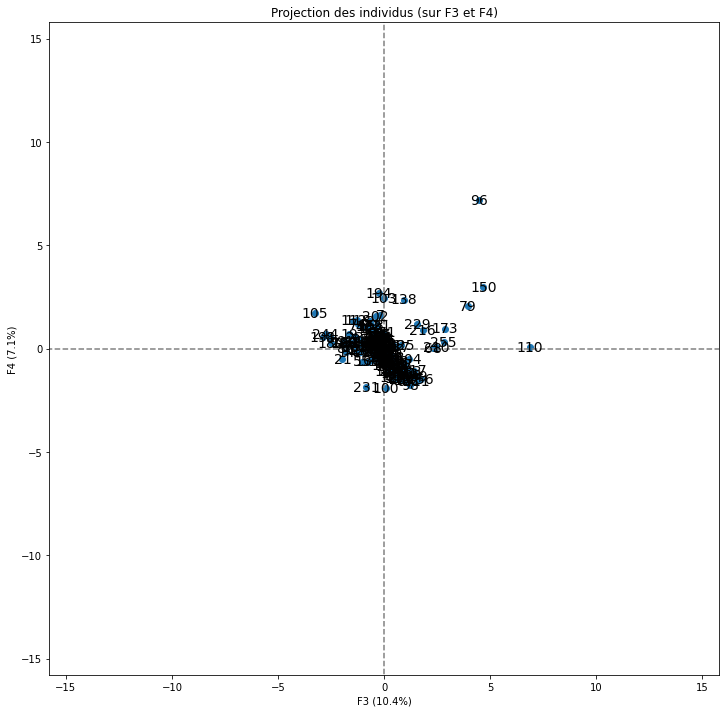

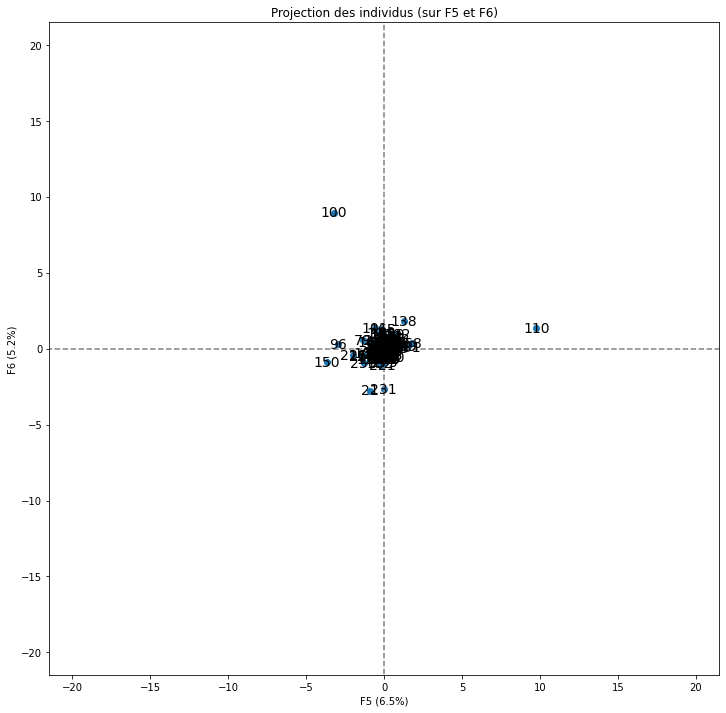

In [72]:
# Projection des individus
X_projected = pca.transform(x_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(names))

plt.show()

In [73]:
# Penchons nous sur les pays. Tous les pays sont extrêmement proche les uns des autres. 
# Difficile de les identifier. Toutefois, certains sortent du lot et ce sont justement ces zones que nous voulons étudier. 

liste_hors_du_lot = [231,21,100,96,150,79,110,173,216,229,255,138,194]
df_hors_du_lot = table_pays.query("Code_zone == @liste_hors_du_lot")
print(df_hors_du_lot)

     Code_zone                                               Zone
14          21                                             Brésil
47          79                                          Allemagne
58          96                           Chine - RAS de Hong-Kong
62         100                                               Inde
72         110                                              Japon
93         138                                            Mexique
100        150                                           Pays-Bas
114        173                                            Pologne
126        194                                    Arabie saoudite
140        216                                          Thaïlande
148        229  Royaume-Uni de Grande-Bretagne et d'Irlande du...
150        231                              États-Unis d'Amérique
157        255                                           Belgique


Analyse à propos des pays:
Les pays se détachant sur F1/F2 seront à éviter pour l'investissement. Ces pays produisent, exportent et consomme déjà leurs poulets. Le Brésil et les USA en particulier. 
Les pays à viser sont ceux important beaucoup de poulet: Hong-Kong, Pays-Bas, Allemagne ou Japon.
Le Japon est en particulier à observer de près car il a beaucoup de variation de stock (rupture de stock = prix élevés sur le marché = de bonnes opportunités pour les exportateurs français).

# Passons au clustering
### d'abord avec une classification hiérarchique ascendante

In [74]:
# source: le code utilisé ici s'appuie sur: cours Openclassrooms accessible à l'adresse: https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

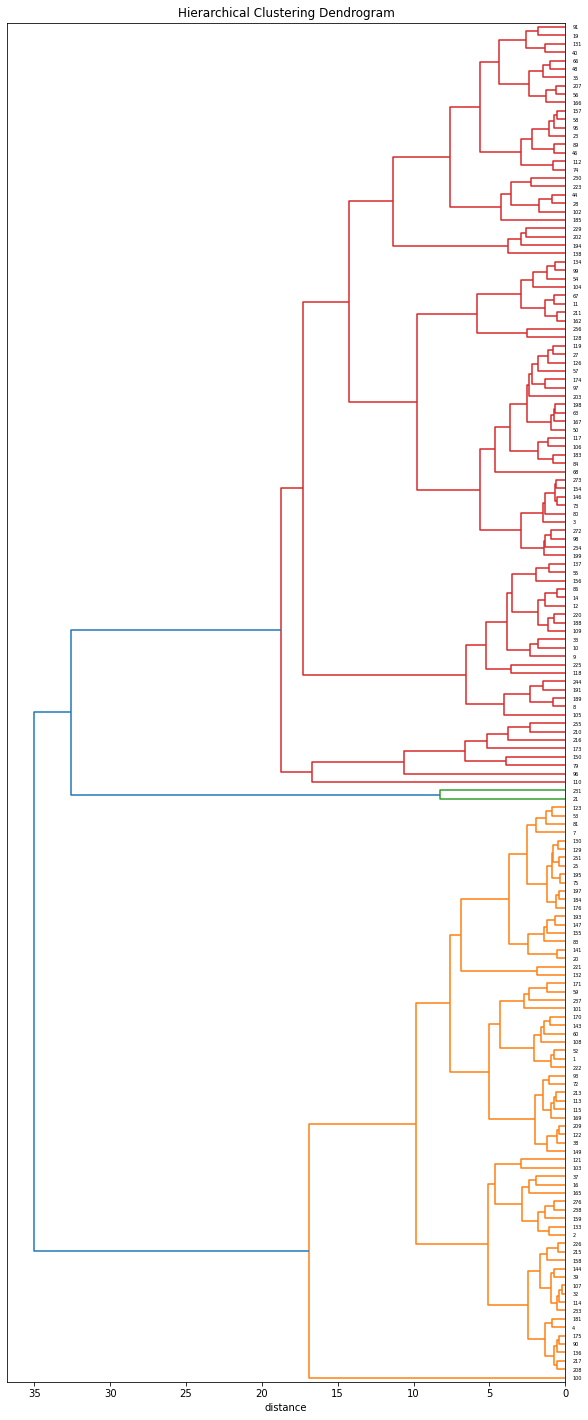

In [75]:
# Clustering hiérarchique
Z = linkage(x_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

 ## Clustering par k-mean

In [76]:
from sklearn.cluster import KMeans
from sklearn import decomposition

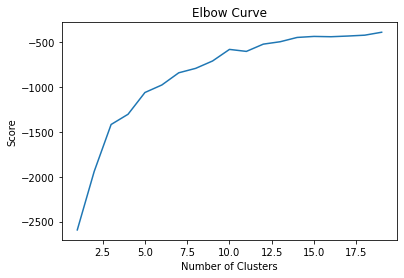

In [77]:
# source de ce code: cours Openclassrooms accessible à l'adresse: https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donneesx_scaled

# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 20
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(x_scaled).score(x_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

/tmp/ipykernel_27949/3542775215.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)


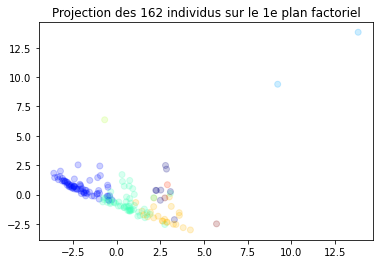

In [78]:
# Nombre de clusters souhaités
n_clust = 8

# préparation des données pour le clustering
X = df_final.values

# Réduire 
x_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(x_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(x_scaled)
X_projected = pca.transform(x_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

/tmp/ipykernel_27949/3423744477.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)


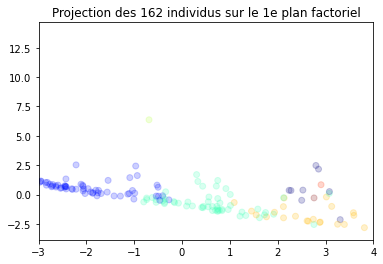

In [79]:
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.xlim([-3, 4])
plt.show(block=False)

In [80]:
clusters

array([3, 1, 3, 1, 1, 5, 5, 5, 3, 5, 5, 1, 5, 1, 2, 3, 1, 3, 3, 1, 5, 3,
       1, 1, 1, 5, 3, 1, 3, 3, 1, 1, 3, 5, 3, 3, 1, 1, 3, 3, 3, 3, 0, 1,
       3, 1, 1, 0, 3, 1, 1, 3, 5, 1, 1, 5, 1, 1, 7, 3, 3, 3, 4, 1, 3, 1,
       3, 5, 3, 1, 3, 5, 6, 1, 1, 1, 1, 3, 5, 3, 1, 1, 1, 3, 3, 1, 1, 5,
       1, 1, 3, 1, 5, 0, 1, 3, 1, 3, 1, 1, 7, 3, 1, 5, 3, 1, 1, 3, 1, 3,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 0, 5, 5, 5, 1, 0, 1, 1, 3, 3, 0,
       3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 5, 1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 1,
       1, 5, 1, 3, 3, 3, 3, 1], dtype=int32)

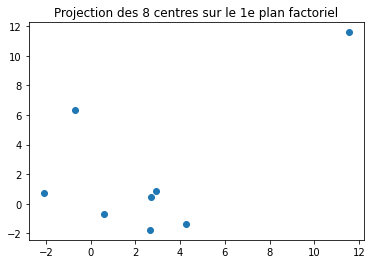

In [81]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

# Réalisation d'une heatmap pour visualiser les différents clusters (à travers leurs centroïdes)

In [82]:
import seaborn as sns

In [83]:
df_clusters = pd.DataFrame(clusters)
df_clusters

,0
0,3
1,1
2,3
3,1
4,1
...,...
157,3
158,3
159,3
160,3


In [84]:
df_final.reset_index(inplace = True)

In [85]:
df_final = pd.concat([df_final, df_clusters], axis = 1)

In [86]:
df_final.rename(columns = {0:"cluster_attribue"}, inplace = True)

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code_zone         162 non-null    int64  
 1   a                 162 non-null    float64
 2   b                 162 non-null    float64
 3   c                 162 non-null    float64
 4   d                 162 non-null    float64
 5   e                 162 non-null    float64
 6   f                 162 non-null    float64
 7   g                 162 non-null    float64
 8   h                 162 non-null    float64
 9   i                 162 non-null    float64
 10  j                 162 non-null    float64
 11  k                 162 non-null    float64
 12  l                 162 non-null    int64  
 13  m                 162 non-null    float64
 14  n                 162 non-null    float64
 15  o                 162 non-null    float64
 16  p                 162 non-null    float64
 1

In [88]:
df_grouper = df_final.loc[:,["g","k","o","cluster_attribue"]]

In [89]:
df_grouper = df_grouper.groupby(by="cluster_attribue").mean()

In [90]:
df_grouper

,g,k,o
cluster_attribue,,,
0,624.250000,1.625000,-0.050000
1,40.114286,0.214286,-0.568714
2,63.000000,40.000000,-0.040000
3,52.642857,20.732143,0.306964
4,0.000000,-119.000000,-0.760000
5,32.181818,19.454545,0.600909
6,1069.000000,859.000000,1.110000
7,757.500000,-47.000000,0.875000


In [91]:
scaler = preprocessing.StandardScaler().fit(df_grouper)

In [92]:
X_scaled = scaler.transform(df_grouper)
X_scaled

array([[ 0.74621732, -0.32633731, -0.3771601 ],
       [-0.73432493, -0.33117042, -1.21225818],
       [-0.67631911, -0.19486469, -0.36106072],
       [-0.70257018, -0.2608763 ,  0.19753043],
       [-0.83599804, -0.73959817, -1.52021641],
       [-0.75443045, -0.26525335,  0.67076348],
       [ 1.87347447,  2.61102665,  1.49036852],
       [ 1.08395091, -0.49292641,  1.11203298]])

In [93]:
df_heatmap = pd.DataFrame(X_scaled)

In [94]:
df_heatmap.rename(columns = {0:"importation",1:"variation_stock",2:"stabilite_politique"}, inplace = True)

In [95]:
df_heatmap

,importation,variation_stock,stabilite_politique
0,0.746217,-0.326337,-0.377160
1,-0.734325,-0.331170,-1.212258
2,-0.676319,-0.194865,-0.361061
3,-0.702570,-0.260876,0.197530
4,-0.835998,-0.739598,-1.520216
5,-0.754430,-0.265253,0.670763
6,1.873474,2.611027,1.490369
7,1.083951,-0.492926,1.112033


In [96]:
def df_norm(df_heatmap):
    return (df_heatmap - df_heatmap.min()) / ( df_heatmap.max() - df_heatmap.min())

df_heatmap_norm = df_norm(df_heatmap)
df_heatmap_norm = df_heatmap_norm*100
print(df_heatmap_norm)

   importation  variation_stock  stabilite_politique
0    58.395697        12.333845            37.967914
1     3.752506        12.189600            10.229183
2     5.893358        16.257669            38.502674
3     4.924496        14.287540            57.056914
4     0.000000         0.000000             0.000000
5     3.010460        14.156906            72.775887
6   100.000000       100.000000           100.000000
7    70.860617         7.361963            87.433155


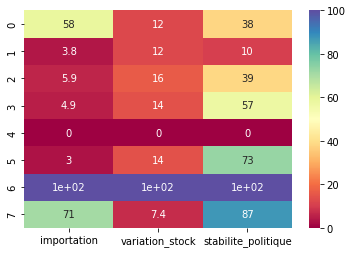

In [97]:
ax = sns.heatmap(df_heatmap_norm,annot = True, cmap = "Spectral")

In [98]:
figure = ax.get_figure()    
figure.savefig('Heatmap_Candidats', dpi=400)

In [105]:
df_vise = df_final[df_final["cluster_attribue"].eq(6)]
df_vise

,Code_zone,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,cluster_attribue
72,110,67.0,18.5,3.95,7.24,2415.0,10.0,1069.0,2359.0,2215.0,0.0,859.0,127502725,-0.717038,40966.6,1.11,2414.0,6


In [100]:
pays_propose = table_pays[table_pays["Code_zone"].eq(110)]
pays_propose

,Code_zone,Zone
72,110,Japon


In [102]:
table_variables

,Symbole,Nom variable complet
0,a,Disponibilité alimentaire (Kcal/personne/jour)
1,b,Disponibilité alimentaire en quantité (kg/pers...
2,c,Disponibilité de matière grasse en quantité (g...
3,d,Disponibilité de protéines en quantité (g/pers...
4,e,Disponibilité intérieure
5,f,Exportations - Quantité
6,g,Importations - Quantité
7,h,Nourriture
8,i,Production
9,j,Résidus


### Groupement moins optimal mais envisageable:

In [103]:
df_alternatif = df_final[df_final["cluster_attribue"].eq(7)]
df_alternatif

,Code_zone,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,cluster_attribue
58,96,210.0,53.51,12.70,22.26,280.0,663.0,907.0,391.0,24.0,-125.0,-12.0,7306322,3.682129,59849.2,0.83,2449.0,7
100,150,70.0,20.33,3.74,8.48,372.0,1418.0,608.0,346.0,1100.0,-78.0,-82.0,17021347,1.366777,55088.6,0.92,2577.0,7


In [106]:
pays_propose = table_pays.query('Code_zone == [96,150]')
pays_propose

,Code_zone,Zone
58,96,Chine - RAS de Hong-Kong
100,150,Pays-Bas
